In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

In [2]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.shape


(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [8]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
all_data.shape

(2919, 79)

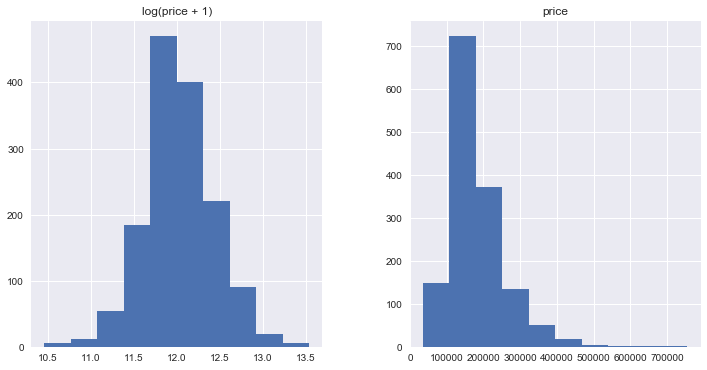

In [10]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()
plt.show()

In [11]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [13]:

numeric_feats = all_data.dtypes[all_data.dtypes!='object'].index

In [14]:
numeric_feats

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold'],
      dtype='object')

In [15]:
skee=skew(train.OverallQual)

In [16]:
skee

0.2167209765258641

In [17]:
#For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness


In [22]:
skewed_feats.dtypes

dtype('float64')

In [19]:
skewed_feats = skewed_feats[skewed_feats > 0.75]

In [20]:
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64

In [23]:
#take index of all the skewed data column
skewed_feats = skewed_feats.index

In [36]:
#Convert categorical variable into dummy/indicator variables
#. If columns is None then all the columns with object or category dtype will be converted.
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])


In [40]:
#convert all the categorical into dummies
all_data = pd.get_dummies(all_data) #which will return sparse matrix hence the column number will increase

In [41]:
all_data.shape

(2919, 288)

In [42]:
#check if any missing value is there 
all_data.isnull().sum()

MSSubClass                 0
LotFrontage              486
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                23
BsmtFinSF1                 1
BsmtFinSF2                 1
BsmtUnfSF                  1
TotalBsmtSF                1
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               2
BsmtHalfBath               2
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
TotRmsAbvGrd               0
Fireplaces                 0
GarageYrBlt              159
GarageCars                 1
GarageArea                 1
WoodDeckSF                 0
OpenPorchSF                0
EnclosedPorch              0
                        ... 
GarageCond_TA              0
PavedDrive_N               0
PavedDrive_P               0
PavedDrive_Y  

In [43]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [44]:


#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]




In [45]:
all_data.shape

(2919, 288)

In [46]:
X_test = all_data[train.shape[0]:]


In [47]:
y = train.SalePrice

In [48]:
all_data.shape

(2919, 288)

In [49]:


from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [50]:
###########  cross validation on Ridge Model

In [51]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [52]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

In [53]:
from sklearn.model_selection import KFold

cv = KFold(5)
ridgecv = RidgeCV(alphas=alphas, cv=cv)

In [54]:
ridgecv.fit(X_train,y)

RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
    cv=KFold(n_splits=5, random_state=None, shuffle=False),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [55]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [56]:
ridgecv.alphas

[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

In [58]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

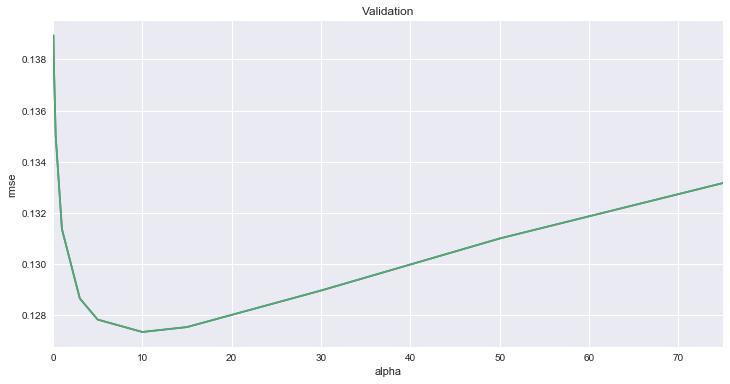

In [59]:
plt.show()



Note the U-ish shaped curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 10 is about right based on the plot above.


In [60]:


cv_ridge.min()



0.12733734668670765

In [ ]:
###########  LASSO CV  

In [61]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)#taking alpha small as for small value for alpha also it tends to become zero 


In [62]:
rmse_cv(model_lasso).mean()

0.12314421090977434

which is less than ridge regression

In [63]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [64]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 110 variables and eliminated the other 178 variables


In [65]:
#One thing to note here however is that the features selected are not necessarily the "correct" ones - especially since there are a lot of collinear features in this dataset. One idea to try here is run Lasso a few times on boostrapped samples and see how stable the feature selection is.

In [66]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [67]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

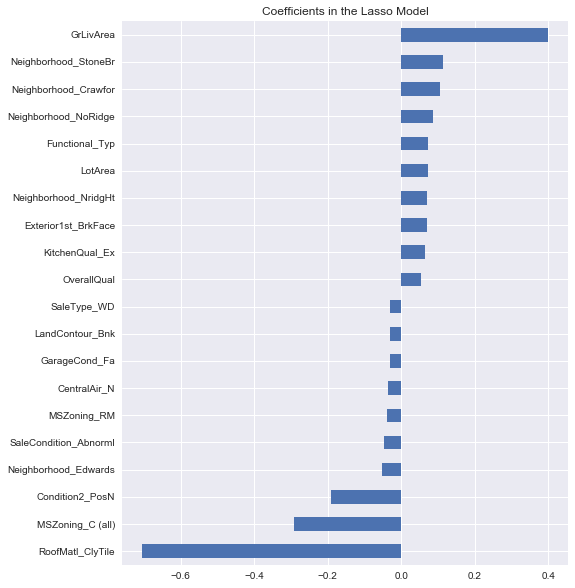

In [68]:
plt.show()

In [69]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

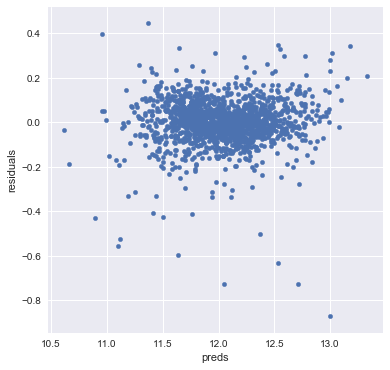

In [72]:
plt.show()

In [73]:
############ XGBoost

In [74]:
import xgboost as xgb

In [75]:


dtrain = xgb.DMatrix(X_train, label = y)

In [78]:
##Elastic Net 
from sklearn.linear_model import ElasticNetCV


In [79]:
Elastic_net_model = ElasticNetCV(cv=5, random_state=0)

In [80]:
Elastic_net_model.fit(X_train, y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [81]:
rmse_cv(Elastic_net_model).mean()

0.18772178391631072

In [85]:
### submision file created

In [86]:

print 'generating file'
y_test_pred = model_lasso.predict(X_test)
submission = pd.DataFrame({"Id": test["Id"],"SalePrice": y_test_pred})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
fileName = "submission.csv"
submission.to_csv(fileName, index=False)

generating file


In [87]:
###using ElasticNet 
print 'generating file'
y_test_pred = Elastic_net_model.predict(X_test)
submission = pd.DataFrame({"Id": test["Id"],"SalePrice": y_test_pred})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
fileName = "submission.csv"
submission.to_csv(fileName, index=False)

generating file


In [88]:
y_test_pred.shape

(1459L,)

In [92]:
###using Decison Tree with grid search
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from operator import itemgetter


In [96]:
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }



In [100]:
dt_grid= DecisionTreeRegressor()

In [98]:


gs_dt=GridSearchCV(dt_grid,param_grid=param_grid,cv=10)

In [101]:
dt_grid.fit(X_train,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [102]:
###using Decision Tree
print 'generating file'
y_test_pred = dt_grid.predict(X_test)
submission = pd.DataFrame({"Id": test["Id"],"SalePrice": y_test_pred})
submission.loc[submission['SalePrice'] <= 0, 'SalePrice'] = 0
fileName = "submission.csv"
submission.to_csv(fileName, index=False)

generating file
